# Logistic Regression for Sentiment Analysis

Adapted from http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/outofcore_modelpersistence.ipynb

<br>
<br>

## The IMDb Movie Review Dataset

In this section, we will train a simple logistic regression model to classify movie reviews from the 50k IMDb review dataset that has been collected by Maas et. al.

> AL Maas, RE Daly, PT Pham, D Huang, AY Ng, and C Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting of the Association for Computational Lin- guistics: Human Language Technologies, pages 142–150, Portland, Oregon, USA, June 2011. Association for Computational Linguistics

[Source: http://ai.stanford.edu/~amaas/data/sentiment/]

The dataset consists of 50,000 movie reviews from the original "train" and "test" subdirectories. The class labels are binary (1=positive and 0=negative) and contain 25,000 positive and 25,000 negative movie reviews, respectively.
For simplicity, I assembled the reviews in a single CSV file.


In [1]:
import pandas as pd
# if you want to download the original file:
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/50k_imdb_movie_reviews.csv')
# otherwise load local file
df = pd.read_csv('shuffled_movie_data.csv')
df.tail()

,review,sentiment
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


Let us shuffle the class labels.

In [2]:
import numpy as np
## uncomment these lines if you have dowloaded the original file:
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index))
#df[['review', 'sentiment']].to_csv('shuffled_movie_data.csv', index=False)

<br>
<br>

## Preprocessing Text Data

Now, let us define a simple `tokenizer` that splits the text into individual word tokens. Furthermore, we will use some simple regular expression to remove HTML markup and all non-letter characters but "emoticons," convert the text to lower case, remove stopwords, and apply the Porter stemming algorithm to convert the words into their root form.

In [3]:
import numpy as np
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
feature3 = ['no', 'not']
feature5 = ['!']
feature4 = stopwords.words('english')[:17]
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('!|(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('1|2|3|4|5|6|7|8|9|0', '', text)
    #text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = re.sub('[\W]+', ' ', text.lower()) + ' '
    text = [w for w in text.split() if (w not in stop) or (w in feature3) or (w in feature4) or (w in feature5)]
    tokenized = [porter.stem(w) for w in text]
    return tokenized

Let's give it at try:

In [4]:
tokenizer('This playing teenag :) me is no a 456 ! of <a> test! :-)</br>')

['play', 'teenag', 'me', 'no', 'test']

## Learning (SciKit)

First, we define a generator that returns the document body and the corresponding class label:

In [5]:
def stream_docs(path):
    with open(path, 'r') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

To conform that the `stream_docs` function fetches the documents as intended, let us execute the following code snippet before we implement the `get_minibatch` function:

In [6]:
next(stream_docs(path='shuffled_movie_data.csv'))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

After we confirmed that our `stream_docs` functions works, we will now implement a `get_minibatch` function to fetch a specified number (`size`) of documents:

In [7]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    for _ in range(size):
        text, label = next(doc_stream)
        docs.append(text)
        y.append(label)
    return docs, y

Next, we will make use of the "hashing trick" through scikit-learns [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html) to create a bag-of-words model of our documents. Details of the bag-of-words model for document classification can be found at  [Naive Bayes and Text Classification I - Introduction and Theory](http://arxiv.org/abs/1410.5329).

In [8]:
from sklearn.feature_extraction.text import HashingVectorizer
vect = HashingVectorizer(decode_error='ignore', 
                         n_features=2**21,
                         preprocessor=None, 
                         tokenizer=tokenizer)

# Exercise 1: define features based on word embeddings (pre-trained word2vec / Glove/Fastext emebddings can be used)
# Define suitable d dimension, and sequence length

## Ejercicio 1

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
feature4 = stopwords.words('english')[:17]

#palabrasPositivas =
#palabrasNegativas =

def featuresByText(text):
    
    vecText = text.split()
    x1 = 0
    x2 = 0
    
    x10 = 0
    x11 = 0
    
    cantNo = 0
    cantPronom = 0
    
    for word in vecText:
        #para x1 y x2
        if (sid.polarity_scores(word)['compound']) >= 0.2:
            x1 = x1 + 1
        elif (sid.polarity_scores(word)['compound']) <= -0.2:
            x2 = x2 + 1
        
       
            
        
        #para x5 y x6
        if(word=="no" or word=="not"):
            cantNo = cantNo + 1     
        
        #para x7
        for pronoun in feature4:
            if(pronoun==word):
                cantPronom = cantPronom + 1
                
    x3 = 1.0*x1/len(vecText)          
    x4 = 1.0*x2/len(vecText)          
    
    if(cantNo > 0):
        x5 = 1
    else:
        x5 = 0
    x6 = cantNo
    
    x7 = cantPronom
    
    x8 = 0 
    if (text.find('!') != -1): 
        x8 = 1 
        
    x9 = np.log( len(vecText) )
    return [x1, x2, x3, x4, x5, x6, x7, x8, x9]
        

def getFeatures(X_train):
    features = []
    for text in X_train:
        xn = featuresByText(text)
        features.append(xn)
    
    return features

datosPrueba = ["i meno hola bad bad !", "hola you weno us not ugly no carro", "caminado good!"]
print(getFeatures(datosPrueba))

[[0, 2, 0.0, 0.3333333333333333, 0, 0, 1, 1, 1.791759469228055], [0, 2, 0.0, 0.25, 1, 2, 1, 0, 2.0794415416798357], [1, 0, 0.5, 0.0, 0, 0, 0, 1, 0.6931471805599453]]


Using the [SGDClassifier]() from scikit-learn, we will can instanciate a logistic regression classifier that learns from the documents incrementally using stochastic gradient descent. 

In [12]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=1, n_iter=1)
doc_stream = stream_docs(path='shuffled_movie_data.csv')
# Exercise 2: Define at least a Three layer neural network. Define its structure (number of hidden neurons, etc)
# Define a nonlinear function for hidden layers.
# Define a suitable loss function for binary classification
# Implement the backpropagation algorithm for this structure
# Do not use Keras / Tensorflow /PyTorch etc. libraries
# Train the model using SGD

## Representación del Modelo

In [13]:
# Importing all the libraries
import pandas as pd
import numpy as np

# Importing libraries for graphics
import matplotlib
import matplotlib.pyplot as plt

#Importing libraries from SciKitLearn for machine learning 
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score

### Initialization

In [14]:
import pandas as pd
import numpy as np

#df = pd.read_csv('W1data.csv')
#df = pd.read_csv('shuffled_movie_data.csv')
#df.head() 
#df.tail()

In [15]:
# Get labels
#y = df[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values
y = df[['sentiment']].values

# Get inputs; we define our x and y here.
#X = df.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1)
X = df.drop(['sentiment'], axis = 1) 
X.shape, y.shape # Print shapes just to check
print("x", X.shape)
print("y", y.shape)
X = X.values

x (50000, 1)
y (50000, 1)


In [16]:
#First we are importing all the libraries

# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score

In [17]:
def softmax(z):
    #Calculate exponent term first
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def softmax_loss(y,y_hat):
    # Clipping value
    minval = 0.000000000001
    # Number of samples
    m = y.shape[0]
    # Loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

def loss_derivative(y,y_hat):
    return (y_hat-y)

def tanh_derivative(x):
    return (1 - np.power(x, 2))

In [18]:
def forward_prop(model,a0):
    
    #Start Forward Propagation
    
    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + our bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = np.tanh(z2)
    
    #Third linear step
    z3 = a2.dot(W3) + b3
    
    #For the Third linear activation function we use the softmax function, either the sigmoid of softmax should be used for the last layer
    a3 = softmax(z3)
    
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache

In [19]:
# This is the BACKWARD PROPAGATION function
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Load forward propagation results
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate loss derivative with respect to output
    dz3 = loss_derivative(y=y,y_hat=a3)

    # Calculate loss derivative with respect to second layer weights
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calculate loss derivative with respect to second layer bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calculate loss derivative with respect to first layer
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calculate loss derivative with respect to first layer weights
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calculate loss derivative with respect to first layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [20]:
#TRAINING PHASE
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_hdim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_hdim))
    W3 = 2 * np.random.rand(nn_hdim, nn_output_dim) - 1
    b3 = np.zeros((1,nn_output_dim))
    
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3,'b3':b3}
    return model

In [21]:
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2,b3,W3 = model['W1'], model['b1'], model['W2'], model['b2'],model['b3'],model["W3"]
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    W3 -= learning_rate * grads['dW3']
    b3 -= learning_rate * grads['db3']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3':W3,'b3':b3}
    return model

In [22]:
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat

In [23]:
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100

In [24]:
losses = []
def train(model,X_,y_,learning_rate, epochs=20000, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, epochs):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss after iteration',i,':',softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('Accuracy after iteration',i,':',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model
np.random.seed(0)





## Features with word embbedings

In [25]:
import gensim
import time
from gensim.models import Word2Vec
#from gensim.test.utils import common_texts

start = time.time() 

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  
#model = Word2Vec('GoogleNews-vectors-negative300.bin', size=300, window=5, min_count=1, workers=4)
#model = Word2Vec(common_texts, size=300, window=1, min_count=1, workers=100)

#word_vectors = model.wv
end = time.time()   
print (end-start,"   seconds")



def features_Word_Embedding(text):
    vecText = tokenizer(text)   
    vectors = []
    for token in vecText:
        if token in model:
            vectors.append( model[token] )
        else:
            vectors.append( [0]*300 )   
    return vectors
        

def getFeatures(X_train):
    features = []
    for text in X_train:
        xn = features_Word_Embedding(text)
        xn = np.asarray(xn)
        xn = xn.max(0)
        features.append(xn)
    
    return features



108.7397997379303    seconds


/home/joel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [26]:
doc_stream = stream_docs(path='shuffled_movie_data.csv')

#Obteniendo data para entrenar
X_train, Y_train = get_minibatch(doc_stream, size=100)
X_train = getFeatures(X_train)

In [27]:
X_test, Y_test = get_minibatch(doc_stream, size=10)
X_test = getFeatures(X_test)

In [29]:
del model

NameError: name 'model' is not defined

In [61]:
def getClassesTarget(Y_train):
    Y_new = []
    for i in Y_train:
        if Y_train[i] == 0:
            Y_new.append([1,0])
        else:
            Y_new.append([0,1])
    return Y_new


Y_train = getClassesTarget(Y_train)

In [62]:
X_train1 = np.asarray(X_train)
Y_train1 = np.asarray(Y_train)

print(X_train1.shape)
print(Y_train1.shape)

(10000, 300)
(10000, 2)


In [63]:
Y_test = getClassesTarget(Y_test)

X_test1 = np.asarray(X_test)
Y_test1 = np.asarray(Y_test)

print(X_test1.shape)
print(Y_test1.shape)

(100, 300)
(100, 2)


Loss after iteration 0 : 0.6934955912364889
Accuracy after iteration 0 : 51.690000000000005 %
Loss after iteration 100 : 0.6927184343152406
Accuracy after iteration 100 : 51.690000000000005 %
Loss after iteration 200 : 0.6926978439064233
Accuracy after iteration 200 : 51.690000000000005 %
Loss after iteration 300 : 0.6926796120410843
Accuracy after iteration 300 : 51.690000000000005 %
Loss after iteration 400 : 0.6926631892329038
Accuracy after iteration 400 : 51.690000000000005 %
Loss after iteration 500 : 0.69264816084278
Accuracy after iteration 500 : 51.690000000000005 %
Loss after iteration 600 : 0.6926342004178689
Accuracy after iteration 600 : 51.690000000000005 %
Loss after iteration 700 : 0.6926210399457179
Accuracy after iteration 700 : 51.690000000000005 %
Loss after iteration 800 : 0.6926084484728766
Accuracy after iteration 800 : 51.690000000000005 %
Loss after iteration 900 : 0.6925962154896144
Accuracy after iteration 900 : 51.690000000000005 %
Loss after iteration 1000 

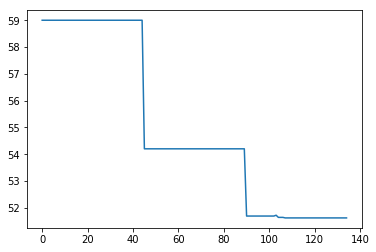

In [64]:
model = initialize_parameters(nn_input_dim = 300, nn_hdim= 5, nn_output_dim= 2)

model = train(model,X_train1,Y_train1,learning_rate=0.07,epochs=4500,print_loss=True)

plt.plot(losses)

In [65]:
y_hat = predict(model, X_test1)
y_true = Y_test1.argmax(axis=1)
print('Accuracy test:',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')

Accuracy test: 41.0 %


# FIN

In [ ]:
#import pyprind
#pbar = pyprind.ProgBar(45)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    #pbar.update()

Depending on your machine, it will take about 2-3 minutes to stream the documents and learn the weights for the logistic regression model to classify "new" movie reviews. Executing the preceding code, we used the first 45,000 movie reviews to train the classifier, which means that we have 5,000 reviews left for testing:

In [ ]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print('Accuracy: %.3f' % clf.score(X_test, y_test))
#Exercise 3: compare  with your Neural Network

I think that the predictive performance, an accuracy of ~87%, is quite "reasonable" given that we "only" used the default parameters and didn't do any hyperparameter optimization. 

After we estimated the model perfomance, let us use those last 5,000 test samples to update our model.

In [18]:
clf = clf.partial_fit(X_test, y_test)

<br>
<br>

# Model Persistence

In the previous section, we successfully trained a model to predict the sentiment of a movie review. Unfortunately, if we'd close this IPython notebook at this point, we'd have to go through the whole learning process again and again if we'd want to make a prediction on "new data."

So, to reuse this model, we could use the [`pickle`](https://docs.python.org/3.5/library/pickle.html) module to "serialize a Python object structure". Or even better, we could use the [`joblib`](https://pypi.python.org/pypi/joblib) library, which handles large NumPy arrays more efficiently.

To install:
conda install -c anaconda joblib

In [21]:
import joblib
import os
if not os.path.exists('./pkl_objects'):
    os.mkdir('./pkl_objects')
    
joblib.dump(vect, './vectorizer.pkl')
joblib.dump(clf, './clf.pkl')

['./clf.pkl']

Using the code above, we "pickled" the `HashingVectorizer` and the `SGDClassifier` so that we can re-use those objects later. However, `pickle` and `joblib` have a known issue with `pickling` objects or functions from a `__main__` block and we'd get an `AttributeError: Can't get attribute [x] on <module '__main__'>` if we'd unpickle it later. Thus, to pickle the `tokenizer` function, we can write it to a file and import it to get the `namespace` "right".

In [22]:
%%writefile tokenizer.py
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    text = [w for w in text.split() if w not in stop]
    tokenized = [porter.stem(w) for w in text]
    return text

Writing tokenizer.py


In [23]:
from tokenizer import tokenizer
joblib.dump(tokenizer, './tokenizer.pkl')

['./tokenizer.pkl']

Now, let us restart this IPython notebook and check if the we can load our serialized objects:

In [24]:
import joblib
tokenizer = joblib.load('./tokenizer.pkl')
vect = joblib.load('./vectorizer.pkl')
clf = joblib.load('./clf.pkl')

After loading the `tokenizer`, `HashingVectorizer`, and the tranined logistic regression model, we can use it to make predictions on new data, which can be useful, for example, if we'd want to embed our classifier into a web application -- a topic for another IPython notebook.

In [25]:
example = ['I did not like this movie']
X = vect.transform(example)
clf.predict(X)

array([0])

In [26]:
example = ['I loved this movie']
X = vect.transform(example)
clf.predict(X)

array([1])